# Experian Gross to Net Income Task 1

### You should submit this notebook, the salary_holdout.csv with the populated net to gross incomes, and a word/pdf doc for task 2. Submit the csv accoridng to the format it is received, with the annual_gross_income column filled with appropriate values.

----------
Written by Lucas Murphy and Emrah Selcuk 2022

## Purpose of this task

By the end of this task you should:
    
    - have an in depth understanding of tax system used in the UK
    - be able to reverse net back into gross income
    - understand some of the challenges faced when inferring gross income from net

### Setup

Read in CSV of incomes...

In [1]:
import pandas as pd

sal_test = pd.read_csv('salary_test_23.csv')
sal_test =sal_test[['location','monthly_net_income','annual_gross_income']]
sal_test

,location,monthly_net_income,annual_gross_income
0,rou,2694.00,42302.20
1,rou,2944.66,46808.45
2,rou,1557.14,21864.27
3,rou,783.31,9399.72
4,rou,2977.18,47393.08
...,...,...,...
4995,rou,1204.16,15518.56
4996,rou,1394.35,18937.71
4997,rou,2127.01,32109.12
4998,rou,1022.83,12330.47


### Data Inspection

It's worthwhile to inspect your data beforehand to ensure it is as expected.

Monthly Net Income Quartiles:
0.25    2042.1175
0.50    2662.2850
0.75    3397.2175
Name: monthly_net_income, dtype: float64

Annual Gross Income Quartiles:
0.25    30582.965
0.50    41776.320
0.75    56369.685
Name: annual_gross_income, dtype: float64


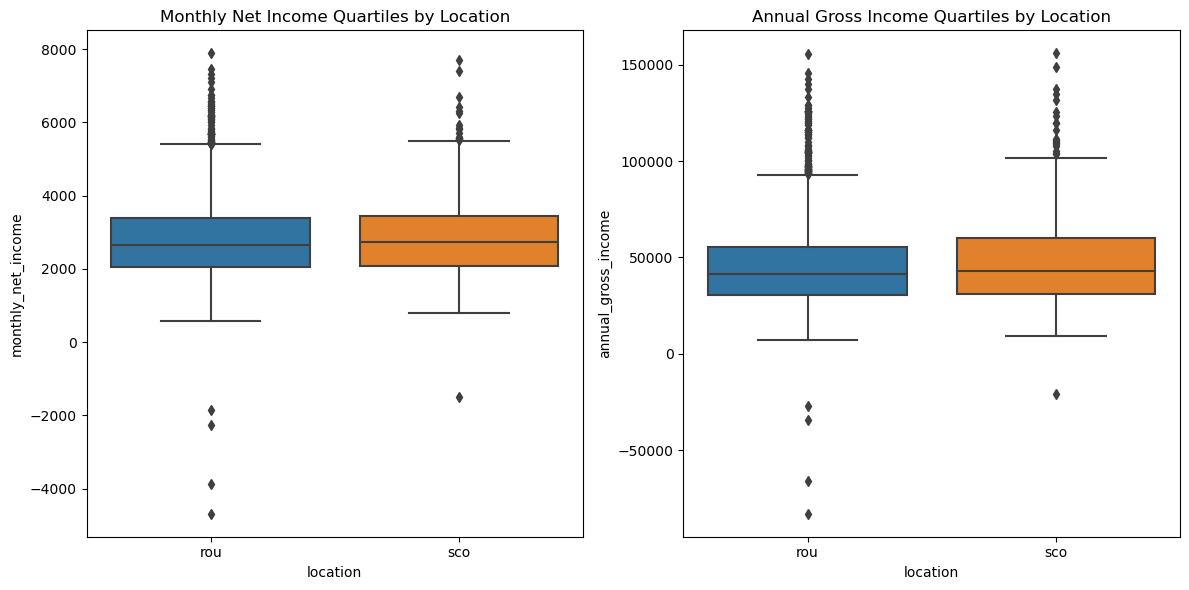

In [51]:

import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('salary_test_23.csv')

# Assuming you have already loaded your dataset into the DataFrame 'df'

# Calculate quartiles for monthly net income and annual gross income
monthly_net_quartiles = df['monthly_net_income'].quantile([0.25, 0.5, 0.75])
annual_gross_quartiles = df['annual_gross_income'].quantile([0.25, 0.5, 0.75])

print("Monthly Net Income Quartiles:")
print(monthly_net_quartiles)

print("\nAnnual Gross Income Quartiles:")
print(annual_gross_quartiles)

# Visualize the quartiles with boxplots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='location', y='monthly_net_income', data=df)
plt.title('Monthly Net Income Quartiles by Location')

plt.subplot(1, 2, 2)
sns.boxplot(x='location', y='annual_gross_income', data=df)
plt.title('Annual Gross Income Quartiles by Location')

plt.tight_layout()
plt.show()


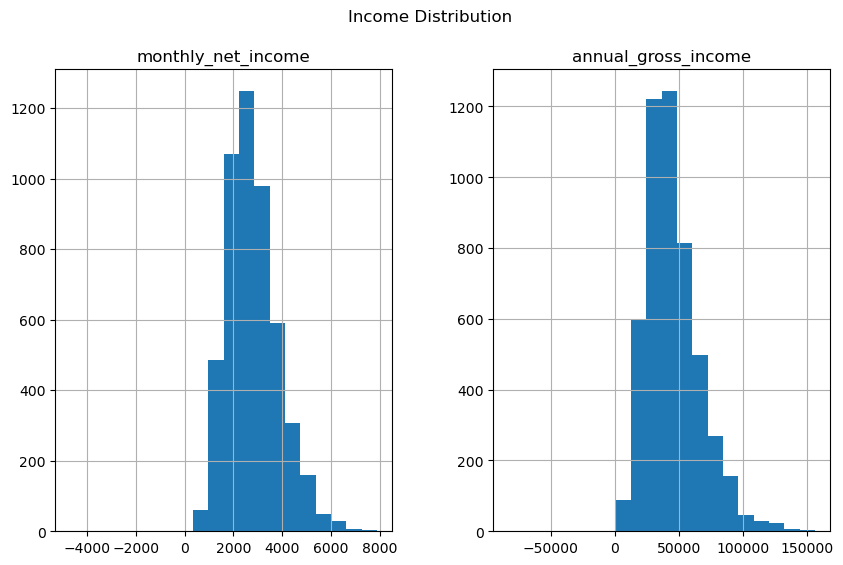

In [52]:
##Distribution of Income:

df[['monthly_net_income', 'annual_gross_income']].hist(bins=20, figsize=(10, 6))
plt.suptitle('Income Distribution')
plt.show()

#the number of individuals who's net income is in between 2000-4000 is maximum .

In [59]:
# Correlation
correlation = df['monthly_net_income'].corr(df['annual_gross_income'])
print(f'Correlation between Monthly Net Income and Annual Gross Income: {correlation}')
# the correlation coefficient between Net and Gross is highly significant 

Correlation between Monthly Net Income and Annual Gross Income: 0.9956377266147419


In [60]:
import sys
assert sys.version_info >= (3, 5)
# Scikit-Learn ≥0.20 is required
import sklearn
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

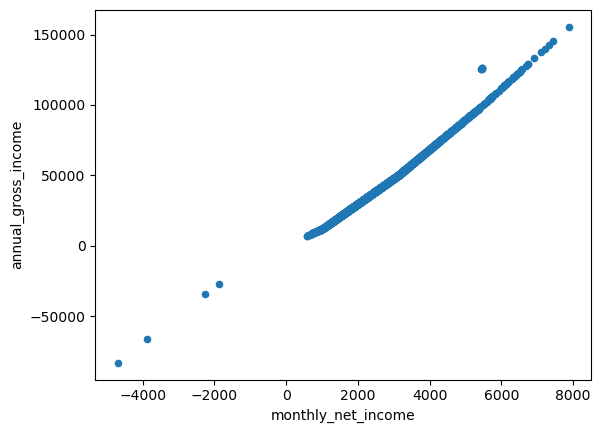

In [61]:
df1 = df[df['location'] == 'rou']
df1.plot(kind='scatter', x="monthly_net_income", y='annual_gross_income')
plt.show()

#the scatter plot for ROU does show a pretty good linear graph with certain outlier

In [53]:
# Correlation
correlation = df['monthly_net_income'].corr(df['annual_gross_income'])
print(f'Correlation between Monthly Net Income and Annual Gross Income: {correlation}')
# the correlation coefficient between Net and Gross is highly significant 

Correlation between Monthly Net Income and Annual Gross Income: 0.9956377266147419


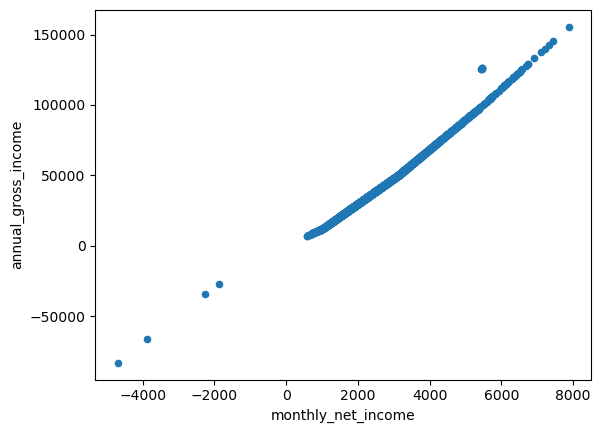

In [66]:
import sys
assert sys.version_info >= (3, 5)
# Scikit-Learn ≥0.20 is required
import sklearn
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

df1 = df[df['location'] == 'rou']
df1.plot(kind='scatter', x="monthly_net_income", y='annual_gross_income')
plt.show()
#the scatter plot for ROU does show a pretty good linear graph with certain outlier

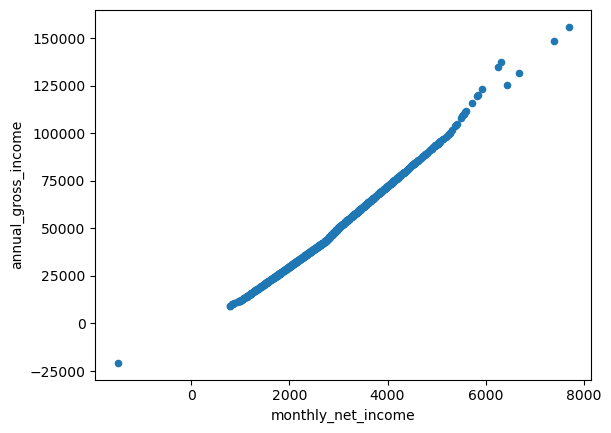

In [62]:
df2 = df[df['location'] == 'sco']
df2.plot(kind='scatter', x="monthly_net_income", y='annual_gross_income')
plt.show()

# for Scotland the scatter plot is linear till 56000, post that there is some non-linear deviation 

In [2]:
sal_test['yr_net'] = abs(sal_test['monthly_net_income'] * 12)
sal_test

,location,monthly_net_income,annual_gross_income,yr_net
0,rou,2694.00,42302.20,32328.00
1,rou,2944.66,46808.45,35335.92
2,rou,1557.14,21864.27,18685.68
3,rou,783.31,9399.72,9399.72
4,rou,2977.18,47393.08,35726.16
...,...,...,...,...
4995,rou,1204.16,15518.56,14449.92
4996,rou,1394.35,18937.71,16732.20
4997,rou,2127.01,32109.12,25524.12
4998,rou,1022.83,12330.47,12273.96


In [3]:
sal_test[sal_test['annual_gross_income'] <0]

,location,monthly_net_income,annual_gross_income,yr_net
387,rou,-4686.46,-83029.50,56237.52
2006,rou,-3889.04,-66167.75,46668.48
2099,rou,-2255.04,-34410.79,27060.48
2908,rou,-1861.52,-27336.27,22338.24
4396,sco,-1492.31,-20666.40,17907.72


In [4]:
copy_sal_test = sal_test[(sal_test['monthly_net_income'] > 0 ) & (sal_test['annual_gross_income'] > 0 )]

In [5]:
copy_sal_test[copy_sal_test['monthly_net_income'] <0 ]

,location,monthly_net_income,annual_gross_income,yr_net


In [6]:
#standard_pa function to calculate taxable income 


def standard_pa(yr_gross):
    
    if yr_gross <= 100000:
        if yr_gross <= 12570:
            return yr_gross
        else:
            tax_inc = yr_gross - 12570
            return(tax_inc)
    elif yr_gross > 100000:
        excess_amt = (yr_gross - 100000)/2
        new_pa = excess_amt - 12570 
        taxable_inc = yr_gross - abs(new_pa)
        return(taxable_inc)
    
def personal_allowance_calc(gross):
    if gross < 100000:
        return(12570)
    elif (gross > 100000) & (gross < 125410):
        excess_amt = (gross - 100000)/2
        reduced_pa = abs(excess_amt -12570)
        return reduced_pa
    elif gross > 125000 :
        return 0


In [7]:
copy_sal_test['taxable_income'] = copy_sal_test['annual_gross_income'].apply(standard_pa)
copy_sal_test['p_allowance_amt'] = copy_sal_test['annual_gross_income'].apply(personal_allowance_calc)
    

# to chekc if our personal allowance is getting calculated as expected for salary ranges above 100000 and above 125000
copy_sal_test[copy_sal_test['annual_gross_income'] > 100000]

C:\Users\shrey\AppData\Local\Temp\ipykernel_15784\2923564392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_sal_test['taxable_income'] = copy_sal_test['annual_gross_income'].apply(standard_pa)
C:\Users\shrey\AppData\Local\Temp\ipykernel_15784\2923564392.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_sal_test['p_allowance_amt'] = copy_sal_test['annual_gross_income'].apply(personal_allowance_calc)


,location,monthly_net_income,annual_gross_income,yr_net,taxable_income,p_allowance_amt
64,rou,6075.64,113602.71,72907.68,107834.065,5768.645
76,rou,7107.33,137525.95,85287.96,131332.975,0.000
131,sco,5600.78,111696.47,67209.36,104974.705,6721.765
142,rou,7324.70,142566.42,87896.40,133853.210,0.000
186,rou,6385.38,120785.08,76624.56,118607.620,2177.460
...,...,...,...,...,...,...
4709,sco,5493.27,107873.90,65919.24,99240.850,8633.050
4736,rou,5716.87,105283.40,68602.44,95355.100,9928.300
4754,sco,5371.34,103538.61,64456.08,92737.915,10800.695
4915,rou,5822.23,107726.53,69866.76,99019.795,8706.735


In [8]:
#tax amount on to be paid for ROU

def tax_to_pay(df1):
    income = df1['annual_gross_income']
    # Thresholds in terms of gross income (annual)
    personal_allowance = df1['p_allowance_amt']
    basic_rate_threshold = 50270
    higher_rate_threshold = 125140
    additional_rate_threshold = 125140



    # Calculate tax
    tax = 0

    if income <= personal_allowance:
        tax = 0
    elif income <= basic_rate_threshold:
        tax = (income - personal_allowance) * .2
    elif income <= higher_rate_threshold:
        tax = (basic_rate_threshold - personal_allowance) * .2 + (income - basic_rate_threshold) * .4
    elif income > additional_rate_threshold:
        tax = (basic_rate_threshold - personal_allowance) * .2 + (higher_rate_threshold - basic_rate_threshold) * .4 + (income - additional_rate_threshold) * .45
    else:
        tax = (basic_rate_threshold - personal_allowance) * .2 + (higher_rate_threshold - basic_rate_threshold) * .4
    return tax


In [9]:
def tax_scot(df9):

    #fetching annual gross from the dataframe in the parameter
    income = df9['annual_gross_income']
    # establishing Thresholds in annual gross
    personal_allowance = df9['p_allowance_amt']
    starter_rate_threshold = 14732
    basic_rate_threshold = 25688
    intermediate_rate_threshold = 43662
    higher_rate_threshold = 125140
    top_rate_threshold = 125140



    # Calculate tax
    tax = 0

    if income <= personal_allowance:
        tax = 0
    elif income <= starter_rate_threshold:
        tax = (income - personal_allowance) * 0.19
    elif income <= basic_rate_threshold:
        tax = (starter_rate_threshold - personal_allowance) * .19 + (income - starter_rate_threshold) * .2
    elif income <= intermediate_rate_threshold:
        tax = (starter_rate_threshold - personal_allowance) * .19 + (basic_rate_threshold - starter_rate_threshold) * .2 + (income - basic_rate_threshold) * .21
    elif income <= higher_rate_threshold:
        tax = (starter_rate_threshold - personal_allowance) * .19 + (basic_rate_threshold - starter_rate_threshold) * .2 + (intermediate_rate_threshold - basic_rate_threshold) * .21 + (income - intermediate_rate_threshold) * .42
    elif income <= top_rate_threshold:
        tax = (starter_rate_threshold - personal_allowance) * .19 + (basic_rate_threshold - starter_rate_threshold) * .2 + (intermediate_rate_threshold - basic_rate_threshold) * .21 + (higher_rate_threshold - intermediate_rate_threshold) * .42 + (income - higher_rate_threshold) * .47
    else:
        tax = (starter_rate_threshold - personal_allowance) * .19 + (basic_rate_threshold - starter_rate_threshold) * .2 + (intermediate_rate_threshold - basic_rate_threshold) * .21 + (higher_rate_threshold - intermediate_rate_threshold) * .42 + (top_rate_threshold - higher_rate_threshold) * .47 + (income - top_rate_threshold) * .47

    return tax




In [10]:
#Function to calculate tax based on location
def calculate_tax(df):
    if df['location'] == 'rou':
        return round(tax_to_pay(df),2)
    else:
        return round(tax_scot(df),2)
        
copy_sal_test['true_tax_amt'] = copy_sal_test.apply(calculate_tax, axis=1)

C:\Users\shrey\AppData\Local\Temp\ipykernel_15784\10866902.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_sal_test['true_tax_amt'] = copy_sal_test.apply(calculate_tax, axis=1)


In [11]:
copy_sal_test

,location,monthly_net_income,annual_gross_income,yr_net,taxable_income,p_allowance_amt,true_tax_amt
0,rou,2694.00,42302.20,32328.00,29732.20,12570.0,5946.44
1,rou,2944.66,46808.45,35335.92,34238.45,12570.0,6847.69
2,rou,1557.14,21864.27,18685.68,9294.27,12570.0,1858.85
3,rou,783.31,9399.72,9399.72,9399.72,12570.0,0.00
4,rou,2977.18,47393.08,35726.16,34823.08,12570.0,6964.62
...,...,...,...,...,...,...,...
4995,rou,1204.16,15518.56,14449.92,2948.56,12570.0,589.71
4996,rou,1394.35,18937.71,16732.20,6367.71,12570.0,1273.54
4997,rou,2127.01,32109.12,25524.12,19539.12,12570.0,3907.82
4998,rou,1022.83,12330.47,12273.96,12330.47,12570.0,0.00


In [12]:
#Calculate NI Contribution

def calculate_ni(df):
    inc=df['annual_gross_income']
    if inc <= 0:
        return 0
    elif inc <= 11904:
        return 0
    elif inc<= 50270:
        ni = (inc - 11904) * 0.1325
        return round(ni, 2)  
    else:
        firstbracket=inc-11904
        if firstbracket>50270:
            ni_lower=(50270*0.1325)
            ni=((firstbracket-50270)*0.0325)+ni_lower
            return round(ni,2)
        else:
            return round((firstbracket*0.1325),2)

In [13]:
copy_sal_test['Cal_NI'] = copy_sal_test.apply(calculate_ni, axis=1)

copy_sal_test

C:\Users\shrey\AppData\Local\Temp\ipykernel_15784\3399253856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_sal_test['Cal_NI'] = copy_sal_test.apply(calculate_ni, axis=1)


,location,monthly_net_income,annual_gross_income,yr_net,taxable_income,p_allowance_amt,true_tax_amt,Cal_NI
0,rou,2694.00,42302.20,32328.00,29732.20,12570.0,5946.44,4027.76
1,rou,2944.66,46808.45,35335.92,34238.45,12570.0,6847.69,4624.84
2,rou,1557.14,21864.27,18685.68,9294.27,12570.0,1858.85,1319.74
3,rou,783.31,9399.72,9399.72,9399.72,12570.0,0.00,0.00
4,rou,2977.18,47393.08,35726.16,34823.08,12570.0,6964.62,4702.30
...,...,...,...,...,...,...,...,...
4995,rou,1204.16,15518.56,14449.92,2948.56,12570.0,589.71,478.93
4996,rou,1394.35,18937.71,16732.20,6367.71,12570.0,1273.54,931.97
4997,rou,2127.01,32109.12,25524.12,19539.12,12570.0,3907.82,2677.18
4998,rou,1022.83,12330.47,12273.96,12330.47,12570.0,0.00,56.51


In [14]:
copy_sal_test['cal_yr_net'] = copy_sal_test['annual_gross_income']-copy_sal_test['true_tax_amt']-copy_sal_test['Cal_NI'] 

C:\Users\shrey\AppData\Local\Temp\ipykernel_15784\1702222403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_sal_test['cal_yr_net'] = copy_sal_test['annual_gross_income']-copy_sal_test['true_tax_amt']-copy_sal_test['Cal_NI']


In [15]:
def error_cal(df):
   a = df['yr_net']
   b = df['cal_yr_net'] - df['yr_net']
   error = b/a
   return abs(round((error * 100),3))


In [16]:
# percent error


copy_sal_test['perc_error'] = copy_sal_test.apply(error_cal, axis = 1)


C:\Users\shrey\AppData\Local\Temp\ipykernel_15784\184098769.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_sal_test['perc_error'] = copy_sal_test.apply(error_cal, axis = 1)


In [17]:
copy_sal_test[(copy_sal_test['annual_gross_income'] > 50270) & (copy_sal_test['annual_gross_income'] < 99000) & (copy_sal_test['location'] != 'rou')]

,location,monthly_net_income,annual_gross_income,yr_net,taxable_income,p_allowance_amt,true_tax_amt,Cal_NI,cal_yr_net,perc_error
41,sco,3004.41,50303.42,36052.92,37733.42,12570.0,9165.92,5087.92,36049.58,0.009
43,sco,4086.96,74030.54,49043.52,61460.54,12570.0,19131.31,7046.11,47853.12,2.427
65,sco,3076.42,51881.72,36917.04,39311.72,12570.0,9828.80,5297.05,36755.87,0.437
75,sco,3455.13,60182.21,41461.56,47612.21,12570.0,13315.01,6396.86,40470.34,2.391
88,sco,4420.70,81345.39,53048.40,68775.39,12570.0,22203.54,7283.85,51858.00,2.244
...,...,...,...,...,...,...,...,...,...,...
4904,sco,3221.18,55054.54,38654.16,42484.54,12570.0,11161.39,5717.45,38175.70,1.238
4926,sco,3418.41,59377.39,41020.92,46807.39,12570.0,12976.98,6290.22,40110.19,2.220
4927,sco,3184.22,54244.46,38210.64,41674.46,12570.0,10821.15,5610.11,37813.20,1.040
4967,sco,3239.09,55447.09,38869.08,42877.09,12570.0,11326.26,5769.46,38351.37,1.332


In [18]:
copy_sal_sorted = copy_sal_test.sort_values(by = ['annual_gross_income', 'taxable_income']).reset_index(drop= True)


copy_sal_sorted

,location,monthly_net_income,annual_gross_income,yr_net,taxable_income,p_allowance_amt,true_tax_amt,Cal_NI,cal_yr_net,perc_error
0,rou,576.83,6921.96,6921.96,6921.96,12570.0,0.00,0.00,6921.96,0.000
1,rou,587.04,7044.48,7044.48,7044.48,12570.0,0.00,0.00,7044.48,0.000
2,rou,619.07,7428.84,7428.84,7428.84,12570.0,0.00,0.00,7428.84,0.000
3,rou,666.25,7995.00,7995.00,7995.00,12570.0,0.00,0.00,7995.00,0.000
4,rou,683.65,8203.80,8203.80,8203.80,12570.0,0.00,0.00,8203.80,0.000
...,...,...,...,...,...,...,...,...,...,...
4990,rou,7324.70,142566.42,87896.40,133853.21,0.0,47843.89,9273.53,85449.00,2.784
4991,rou,7454.04,145565.60,89448.48,135352.80,0.0,49193.52,9371.00,87001.08,2.736
4992,sco,7393.91,148659.54,88726.92,136899.77,0.0,54039.76,9471.56,85148.22,4.033
4993,rou,7883.25,155518.30,94599.00,140329.15,0.0,53672.23,9694.46,92151.61,2.587


In [19]:
#not required

'''def calculate_gross_from_net(net_income):
    # Net income thresholds and rates
    net_thres_1 = 12481.75
    net_thres_2 = 37646.8375
    net_thres_3 = 76075.3325
    net_thres_4 = 95143.625

    rate_1 = 0.0
    rate_2 = 0.20
    rate_3 = 0.40
    rate_4 = 0.45

    # Calculate gross income
    gross_income = 0

    if net_income <= net_thres_1:
        gross_income = net_income / (1 - rate_1)
    else:
        if net_income <= net_thres_2:
            gross_income = (net_income / (1 - rate_2)) + net_thres_1
        else:
            if net_income <= net_thres_3:
                gross_income = (net_income / (1 - rate_3)) + net_thres_2
            else:
                if net_income <= net_thres_4:
                    gross_income = (net_income / (1 - rate_4)) + net_thres_3

    return gross_income'''




'def calculate_gross_from_net(net_income):\n    # Net income thresholds and rates\n    net_thres_1 = 12481.75\n    net_thres_2 = 37646.8375\n    net_thres_3 = 76075.3325\n    net_thres_4 = 95143.625\n\n    rate_1 = 0.0\n    rate_2 = 0.20\n    rate_3 = 0.40\n    rate_4 = 0.45\n\n    # Calculate gross income\n    gross_income = 0\n\n    if net_income <= net_thres_1:\n        gross_income = net_income / (1 - rate_1)\n    else:\n        if net_income <= net_thres_2:\n            gross_income = (net_income / (1 - rate_2)) + net_thres_1\n        else:\n            if net_income <= net_thres_3:\n                gross_income = (net_income / (1 - rate_3)) + net_thres_2\n            else:\n                if net_income <= net_thres_4:\n                    gross_income = (net_income / (1 - rate_4)) + net_thres_3\n\n    return gross_income'

In [20]:
def calculate_taxable_income(net_income):
    if net_income > 150000:
        taxable_income = net_income / (1 - 0.45)
    elif 50271 <= net_income <= 125140:
        taxable_income = net_income / (1 - 0.40)
    elif 12571 <= net_income <= 50270:
        taxable_income = net_income / (1 - 0.20)
    else:
        taxable_income = net_income / (1 - 0)

    return taxable_income



### Functionality

Write a program that converts monthly net income to annual gross income. You can assume that the monthly income is constant month to month. It is *strongly* advised to first write functionality to convert gross to net and confirm this with the provided test set. Your grade for this section will be based solely on your calculations for the holdout set.

For transparency, write your algorithm according to the tax brackets and rates communicated in the presentation slides.

In [21]:
#IMPORTING THE HOLDOUT SALARY CSV FILE
sal_holdout = pd.read_csv('salary_holdout_23.csv')

#CONVERTING MOENTLY NET INCOMES INTO YEARLY NET INCOMES 
sal_holdout['yr_net'] = abs(sal_test['monthly_net_income'] * 12)

In [22]:
def rou_gross_from_net(net_income):
    #FETCHING THE YEAR NET INCOMES FROM THE DATAFRAME PASSED INTO THE ARGUMENT 
    net=net_income['yr_net']

    # DEFINING NET INCOMES THRESHOLDS TO THE CORRESPONDING ANNUAL GROSS THRESHOLDS
    net_thres_1 = 12481.75          #gross_income  = 12570
    net_thres_2 = 37646.84          #gross_income  = 50270
    net_thres_3 = 65868.3345        #gross_income  = 100000
    net_thres_4 = 76075.33          #gross_income  = 125410
    net_thres_5=95143.63            #gross_income  = 150000
 
    gross_income = 0

    if net <= 11904:            
        gross_income = net                             #for gross income that comes under 11905 the net income remains unchanged .
    elif (net>11904 and net<=net_thres_1):
        ni=(1325*(net-11905))/8675                     #for gross incomes that lie between 11905 - 12570 where no tax is applied but NI comes into picture
        gross_income=net+gross_income
    elif (net>net_thres_1 and net<=net_thres_2):        
        gross_income = (net-4091.41)/0.6675            #for gross incomes above 12570 to 50270
    elif (net>net_thres_2 and net<=net_thres_3):
        gross_income = (net-9118.47)/0.5675            #for gross incomes above 50270 to 125410
    elif (net>net_thres_3 and net<=net_thres_4):
        gross_income=(net-19162.78)/0.4675             #for gross incomes above 125410 to 150000
    else:
        gross_income=(net-12861.42)/0.5175             #for gross incomes above  150000
        
    return gross_income

In [23]:
def scot_gross_from_net(net_income):
    
    net=net_income['yr_net']
    
    net_thres_1 = 12481.88          #gross_income  = 12570
    net_thres_2 = 13946.82          #gross_income  = 14732
    net_thres_3 = 21259.55          #gross_income  = 25688
    net_thres_4 = 33078.07          #gross_income  = 43662
    net_thres_5 =36035.33           #gross_income  = 125140
    net_thres_6 =77026.9            #gross_income  = 150000
    gross_income = 0               


    
    if net <= 11904:
        gross_income = net                                 #for gross income that comes under 11905 the net income remains unchanged .            
    elif ((net>11905) and (net<=12481.88)):
        ni=(1325*(net-11905))/8675                         #for gross incomes that lie between 11905 - 12570 where no tax is applied but NI comes into picture
        gross_income=net+gross_income     
    elif ((net>net_thres_1) and (net<=net_thres_2)):
        gross_income = (net-3965.89)/0.6675                #for gross incomes above 12570 to 14732
    elif (net>net_thres_2 and net<=net_thres_3):
        gross_income = (net-4112.81)/0.6675                #for gross incomes above 14732 to 25688
    elif(net>net_thres_3 and net<=net_thres_4):
        gross_income = (net-4370.25)/0.6575                #for gross incomes above 25688 to 43662
    elif(net>net_thres_4 and net<=net_thres_5):
        gross_income = (net-13539.5)/0.4475                #for gross incomes above 43662 to 125140
    elif(net>net_thres_5 and net<=net_thres_6):
        gross_income = (net-8512.75)/0.5475                #for gross incomes above 125140 to 150000
    else:
        gross_income=(net-14769.81)/0.4975                 #for gross incomes above  150000
    return round(gross_income,2)

In [24]:
#applying our annual gross estimation function on our test datasset to check the error percent and accuracy 

def calculate_gross(df):
    if df['location'] == 'rou':
        return rou_gross_from_net(df)
    else:
        return scot_gross_from_net(df)
        
copy_sal_sorted['annual_gross_income_est'] = copy_sal_sorted.apply(calculate_gross, axis=1)

In [25]:
copy_sal_sorted

,location,monthly_net_income,annual_gross_income,yr_net,taxable_income,p_allowance_amt,true_tax_amt,Cal_NI,cal_yr_net,perc_error,annual_gross_income_est
0,rou,576.83,6921.96,6921.96,6921.96,12570.0,0.00,0.00,6921.96,0.000,6921.960000
1,rou,587.04,7044.48,7044.48,7044.48,12570.0,0.00,0.00,7044.48,0.000,7044.480000
2,rou,619.07,7428.84,7428.84,7428.84,12570.0,0.00,0.00,7428.84,0.000,7428.840000
3,rou,666.25,7995.00,7995.00,7995.00,12570.0,0.00,0.00,7995.00,0.000,7995.000000
4,rou,683.65,8203.80,8203.80,8203.80,12570.0,0.00,0.00,8203.80,0.000,8203.800000
...,...,...,...,...,...,...,...,...,...,...,...
4990,rou,7324.70,142566.42,87896.40,133853.21,0.0,47843.89,9273.53,85449.00,2.784,144995.130435
4991,rou,7454.04,145565.60,89448.48,135352.80,0.0,49193.52,9371.00,87001.08,2.736,147994.318841
4992,sco,7393.91,148659.54,88726.92,136899.77,0.0,54039.76,9471.56,85148.22,4.033,148657.510000
4993,rou,7883.25,155518.30,94599.00,140329.15,0.0,53672.23,9694.46,92151.61,2.587,157947.014493


In [26]:
copy_sal_sorted['gross_per_error'] = abs(copy_sal_sorted['annual_gross_income_est'] - copy_sal_sorted['annual_gross_income'] ) / copy_sal_sorted['annual_gross_income']
copy_sal_sorted

,location,monthly_net_income,annual_gross_income,yr_net,taxable_income,p_allowance_amt,true_tax_amt,Cal_NI,cal_yr_net,perc_error,annual_gross_income_est,gross_per_error
0,rou,576.83,6921.96,6921.96,6921.96,12570.0,0.00,0.00,6921.96,0.000,6921.960000,1.313927e-16
1,rou,587.04,7044.48,7044.48,7044.48,12570.0,0.00,0.00,7044.48,0.000,7044.480000,0.000000e+00
2,rou,619.07,7428.84,7428.84,7428.84,12570.0,0.00,0.00,7428.84,0.000,7428.840000,0.000000e+00
3,rou,666.25,7995.00,7995.00,7995.00,12570.0,0.00,0.00,7995.00,0.000,7995.000000,0.000000e+00
4,rou,683.65,8203.80,8203.80,8203.80,12570.0,0.00,0.00,8203.80,0.000,8203.800000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...
4990,rou,7324.70,142566.42,87896.40,133853.21,0.0,47843.89,9273.53,85449.00,2.784,144995.130435,1.703564e-02
4991,rou,7454.04,145565.60,89448.48,135352.80,0.0,49193.52,9371.00,87001.08,2.736,147994.318841,1.668470e-02
4992,sco,7393.91,148659.54,88726.92,136899.77,0.0,54039.76,9471.56,85148.22,4.033,148657.510000,1.365536e-05
4993,rou,7883.25,155518.30,94599.00,140329.15,0.0,53672.23,9694.46,92151.61,2.587,157947.014493,1.561690e-02


In [27]:
#copy_sal_sorted['gross_per_error'].min()  #minimum percent error is .0
copy_sal_sorted['gross_per_error'].max()    #maximum percent error is .2121

0.2121899050589998

In [72]:

len(copy_sal_sorted[copy_sal_sorted['gross_per_error']  > 0.0006373941262331186])

111

In [39]:
copy_sal_sorted['gross_per_error'].mean() 

0.0006373941262331186

In [73]:

#Function to calculate gross based on location
def calculate_gross(df):
    if df['location'] == 'rou':
        return rou_gross_from_net(df)
    else:
        return scot_gross_from_net(df)
        
sal_holdout['annual_gross_income'] = sal_holdout.apply(calculate_gross, axis=1)

sal_holdout.to_csv('salary_holdout_23_output.csv')

In [30]:
#sal_holdout.drop('gross', axis=1)